In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use('ggplot')

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] = (20,12)

In [3]:
#task 2 data preprocessing

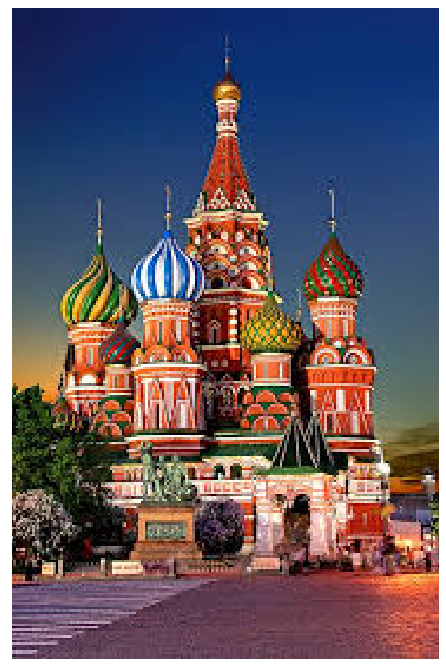

In [4]:

img = io.imread('images/1-Saint-Basils-Cathedral.jfif')

# xticks and ytikcks are used for displaying the numbers on the axis.
# we will set xticks and yticks to zero beause iamges dont need axis values
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [5]:
img.shape

(277, 182, 3)

In [6]:
# the imamge is like 277x182 gird stack over each other for 3 times.
# now we willl convert each 277x182 grid into 1D array for each color channel i.e. 3
# alos normalizing the pixel value i.ie value chage to rnage between 0 and 1
img_data = (img/255.0).reshape(-1,3)
img_data.shape

(50414, 3)

In [7]:
#task 3 visualizing the color space using point clouds

In [8]:
from plot_utils import plot_utils

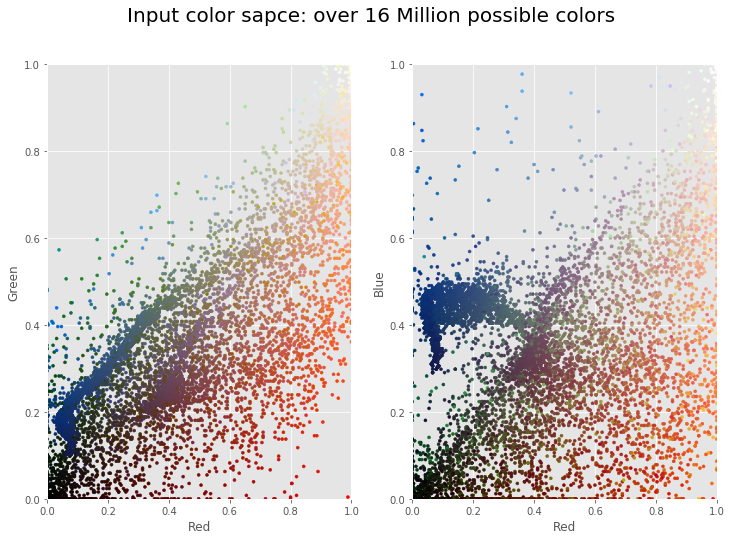

In [9]:
x = plot_utils(img_data,title='Input color sapce: over 16 Million possible colors')
x.colorSpace()

In [10]:
# task 4 k-mean color on the original color iamge and reduce color from 16milliion to just 16
# there by comprseeing the image

In [11]:
from sklearn.cluster import MiniBatchKMeans

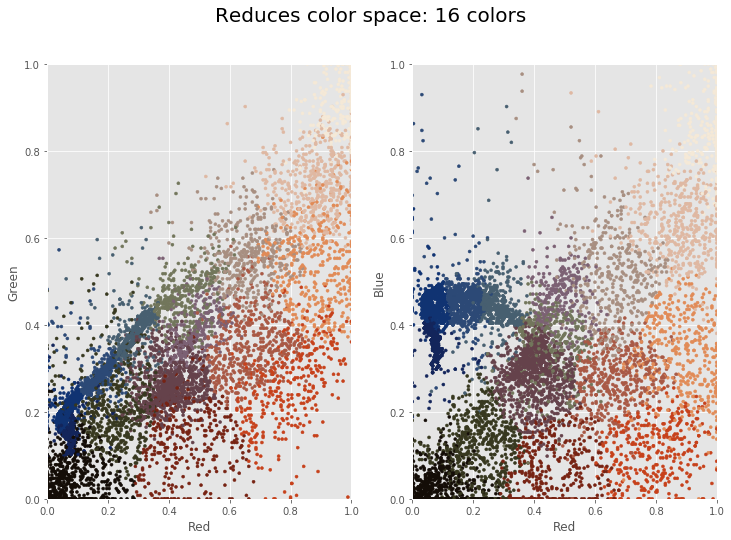

In [16]:
kmeans = MiniBatchKMeans(16).fit(img_data)
#recoloring with new coolor fro kmeans
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title = 'Reduces color space: 16 colors')
y.colorSpace()

In [17]:
#task 5 kmeans image compressing with interavtive controls


In [18]:
img_dir = 'images/'

In [19]:
@interact
#higher the range of intslider more time for kmeans to work
def color_compression(image=os.listdir(img_dir),k=IntSlider(min=1,max=256,step=1,value=16,
                                                        continuous_update=False,
                                                        layout=dict(width='100%'))): 
    input_img = io.imread(img_dir+image)
    img_data = (input_img / 255.0).reshape(-1,3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.suptitle('K Means Image Copression',fontsize=20)
    
    ax1.set_title('Compressed Image')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Orginal (16,777,216) colors')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-.jfif', '1-Saint-Basils-Cathedral.jfif', '1-Sa…